In [2]:
%matplotlib inline
%load_ext watermark
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import scipy as sp
import sklearn
import sys
import nltk
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer as lemm, SnowballStemmer as stemm
from nltk.stem.porter import *
from nltk.corpus import stopwords
import gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import ldamodel
from gensim.models.ldamodel import LdaModel
from gensim.models import Phrases
import gensim.corpora;
from gensim.corpora.dictionary import Dictionary
from gensim import corpora, models
import pyLDAvis.gensim_models; pyLDAvis.enable_notebook()
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.decomposition import LatentDirichletAllocation
from statsmodels.tsa.stattools import grangercausalitytests
from operator import itemgetter
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.utils import check_random_state
from sklearn.decomposition._online_lda_fast import _dirichlet_expectation_2d
import pyLDAvis.sklearn
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pickle, string, re, time, os, io
import base64
from io import BytesIO
from fasttext import FastText
import warnings
warnings.filterwarnings('ignore')
sns.set_context('poster')

%watermark -a 'Hanif' -d -t -v -p numpy,pandas,matplotlib,plotly,gensim,nltk,sklearn,fasttext

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Author: Hanif

Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.18.1

numpy     : 1.19.5
pandas    : 1.2.1
matplotlib: 3.3.1
plotly    : 5.1.0
gensim    : 3.8.1
nltk      : 3.4.5
sklearn   : 0.0
fasttext  : 0.9.2



In [3]:
# # Loading the data
start = time.time()
data = pd.read_csv(r"E:\dataset\shopee_ulasan_label7.csv", error_bad_lines=True)
print(start)
print(data)

1628159109.1274862
                     user                                             ulasan  \
0     Juwairiah Juwairiah  Aplikasi shopee aku kok gak bisa gunain gratis...   
1           Sabyan Keisha  Menyebalkan vocer penguna baru tidak bisa di p...   
2                Teno Tee  Saya sebagai penjual kecewa, penarikan saldo m...   
3                Nana nae  Aplukasi apa sih ini disuruh buat nama uda gue...   
4           Nurul Hamidah  Makin kesini Shoppe makin gak jelas. Apaan kab...   
...                   ...                                                ...   
2932   Ameliatus Sholihah  Sangat nyaman untuk berbelanja di masa pandemi...   
2933          Dwipa Aulia  Aplikasi ini sangat burik tapi sangat bagus se...   
2934          `uci sefira  shopee bagus banget, tapi skrng ga ada gratong...   
2935         Irvani Juita  aplikasi jelek!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...   
2936      Pengguna Google  Tambah lagi jadi bintang 5 karna vocer gratis ...   

      rating    labe

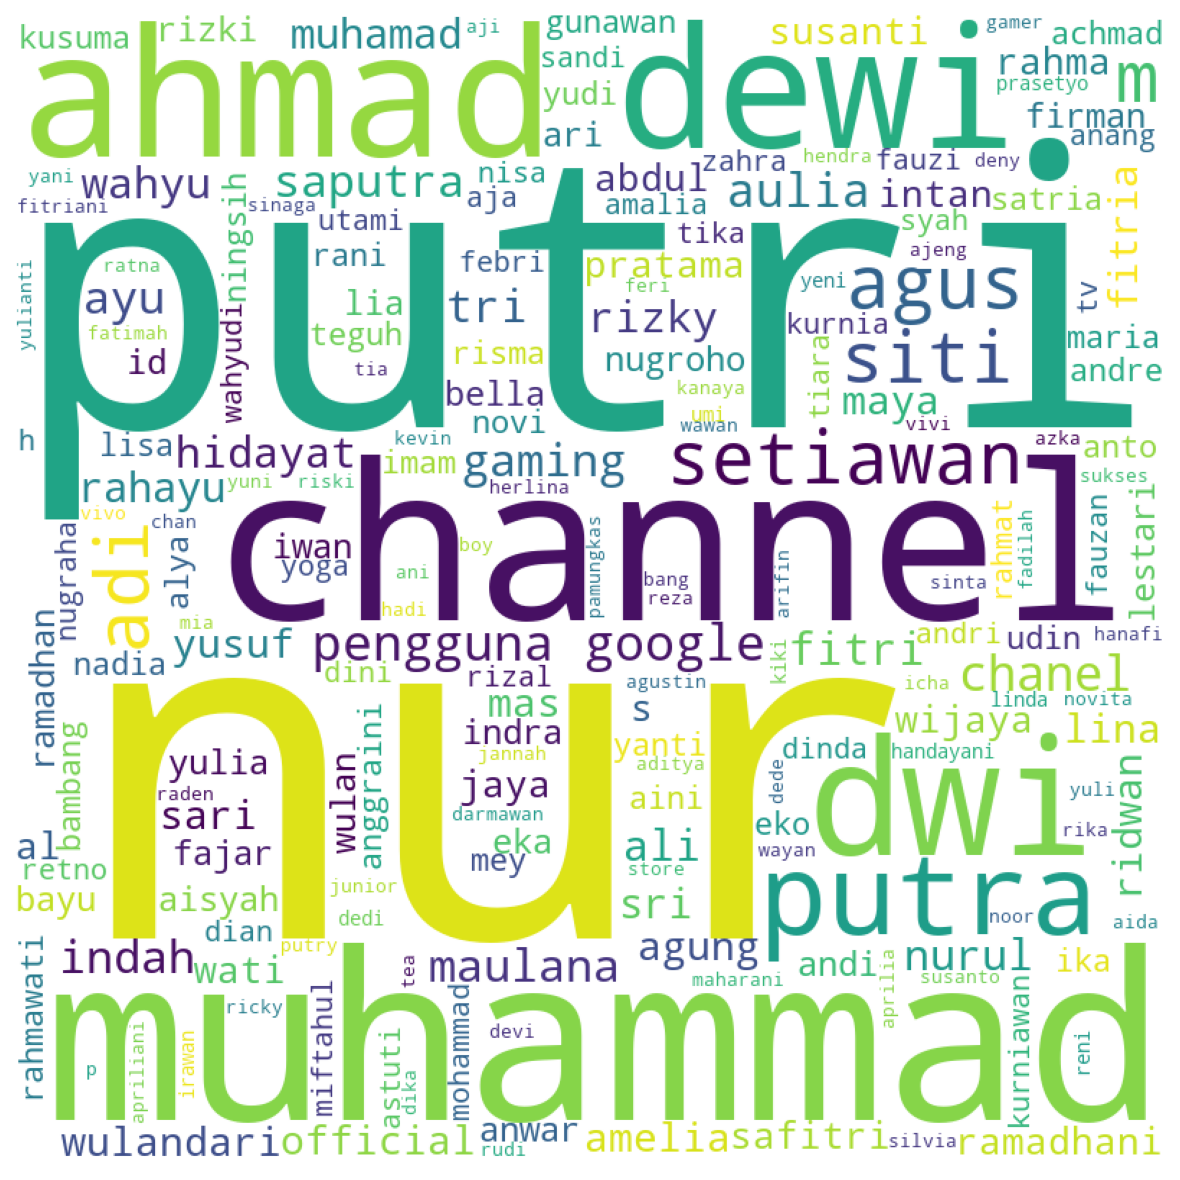

In [4]:
comment_words = ''
stop = set(STOPWORDS)
 
# iterate through the csv file
for val in data.user:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

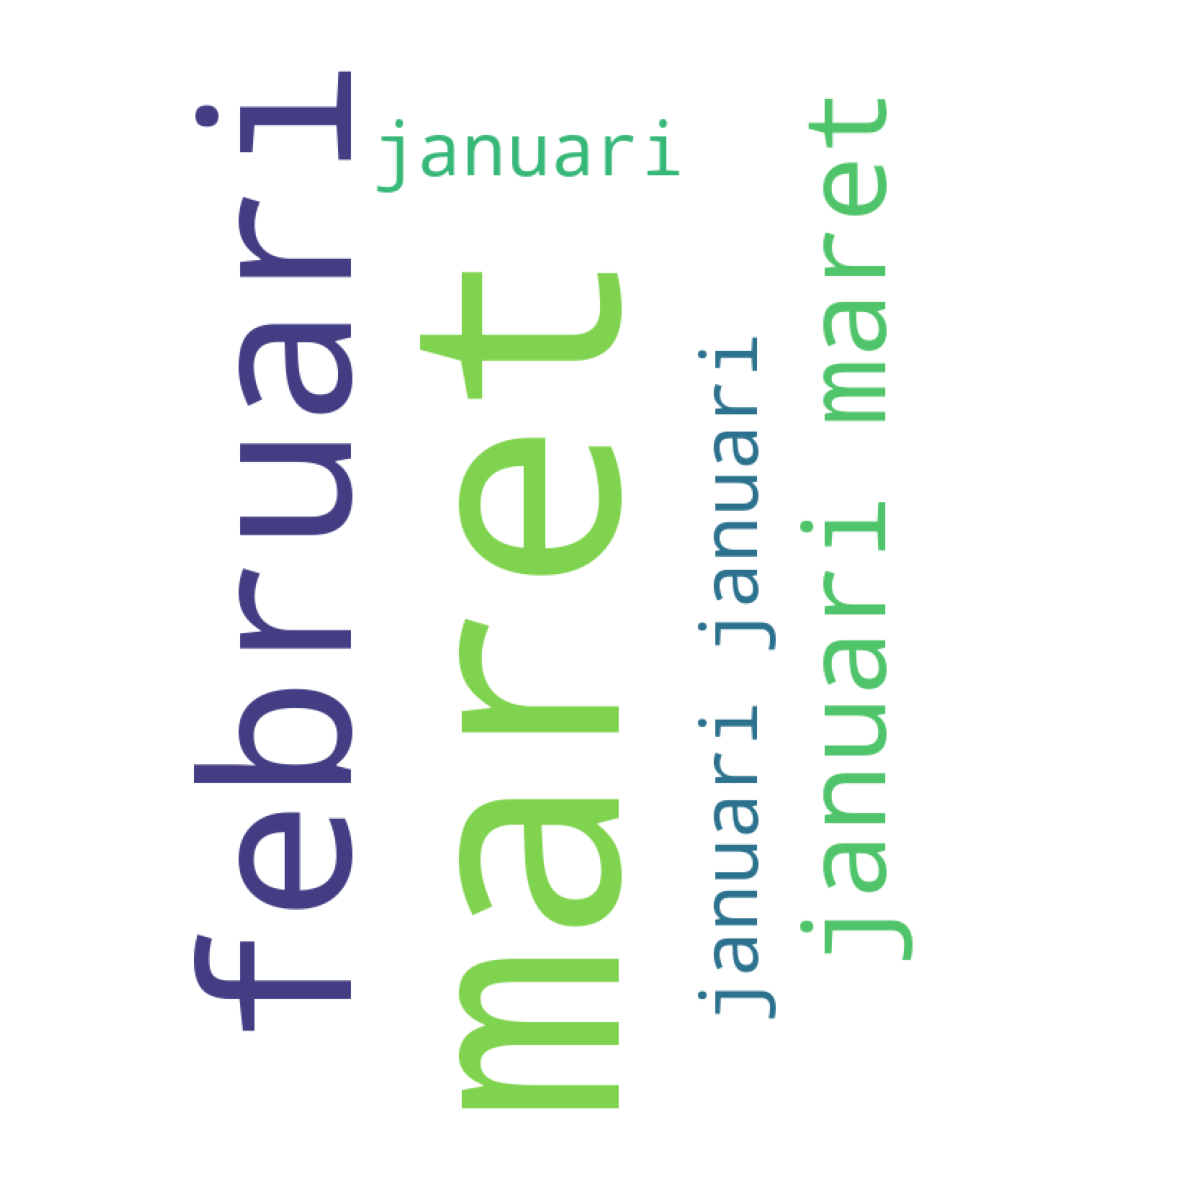

In [5]:
comment_words = ''
stop = set(STOPWORDS)
 
# iterate through the csv file
for val in data.tanggal:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

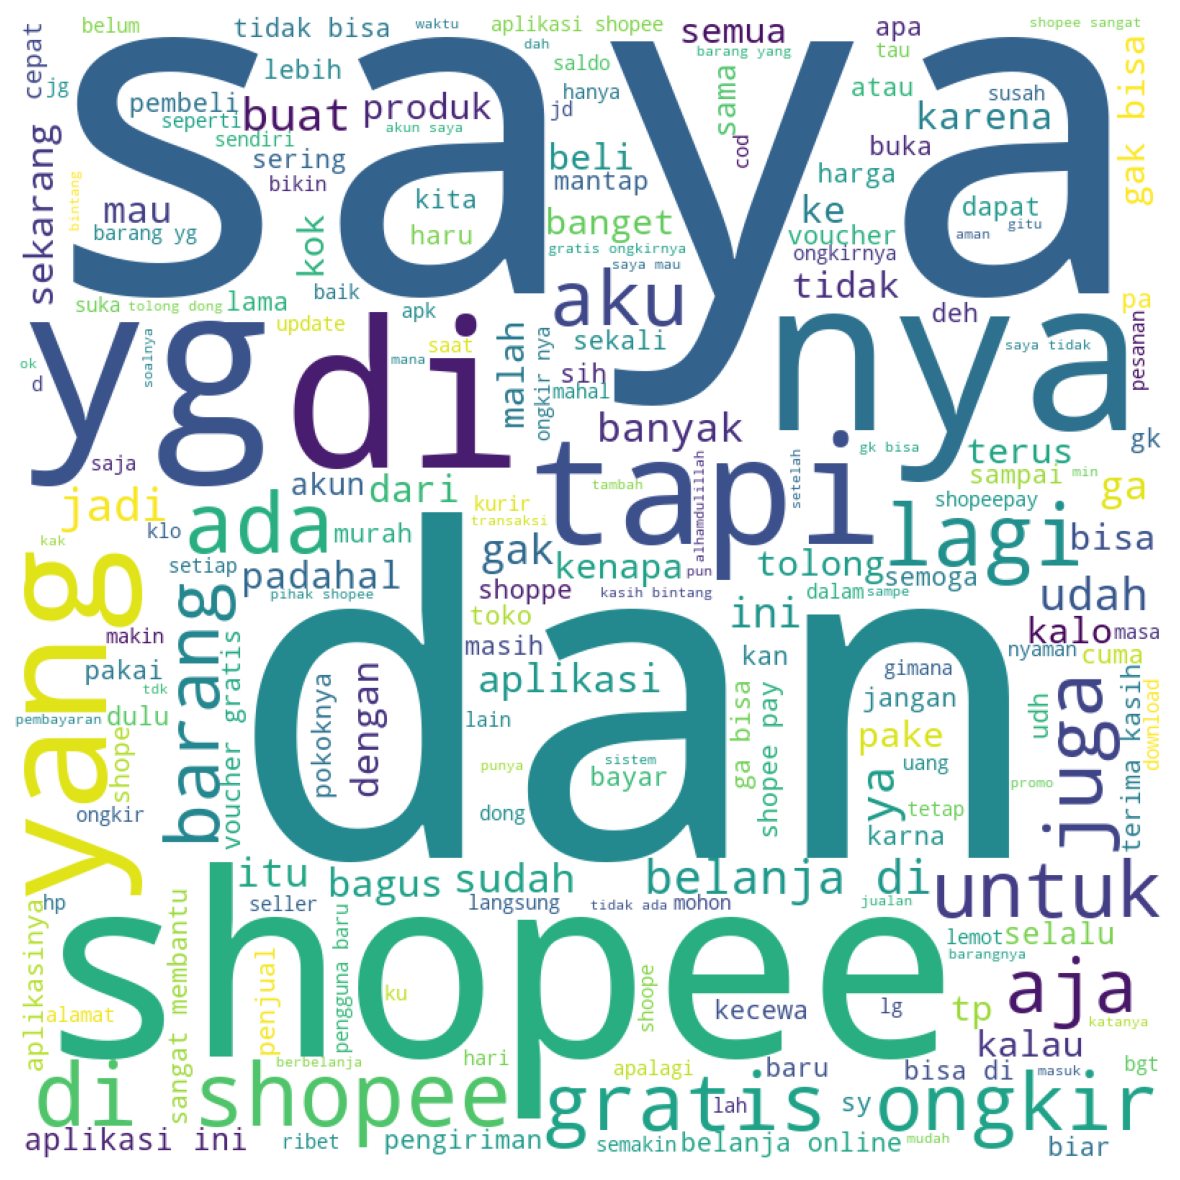

In [6]:
comment_words = ''
stop = set(STOPWORDS) # wordcloud
 
# iterate through the csv file
for val in data.ulasan:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

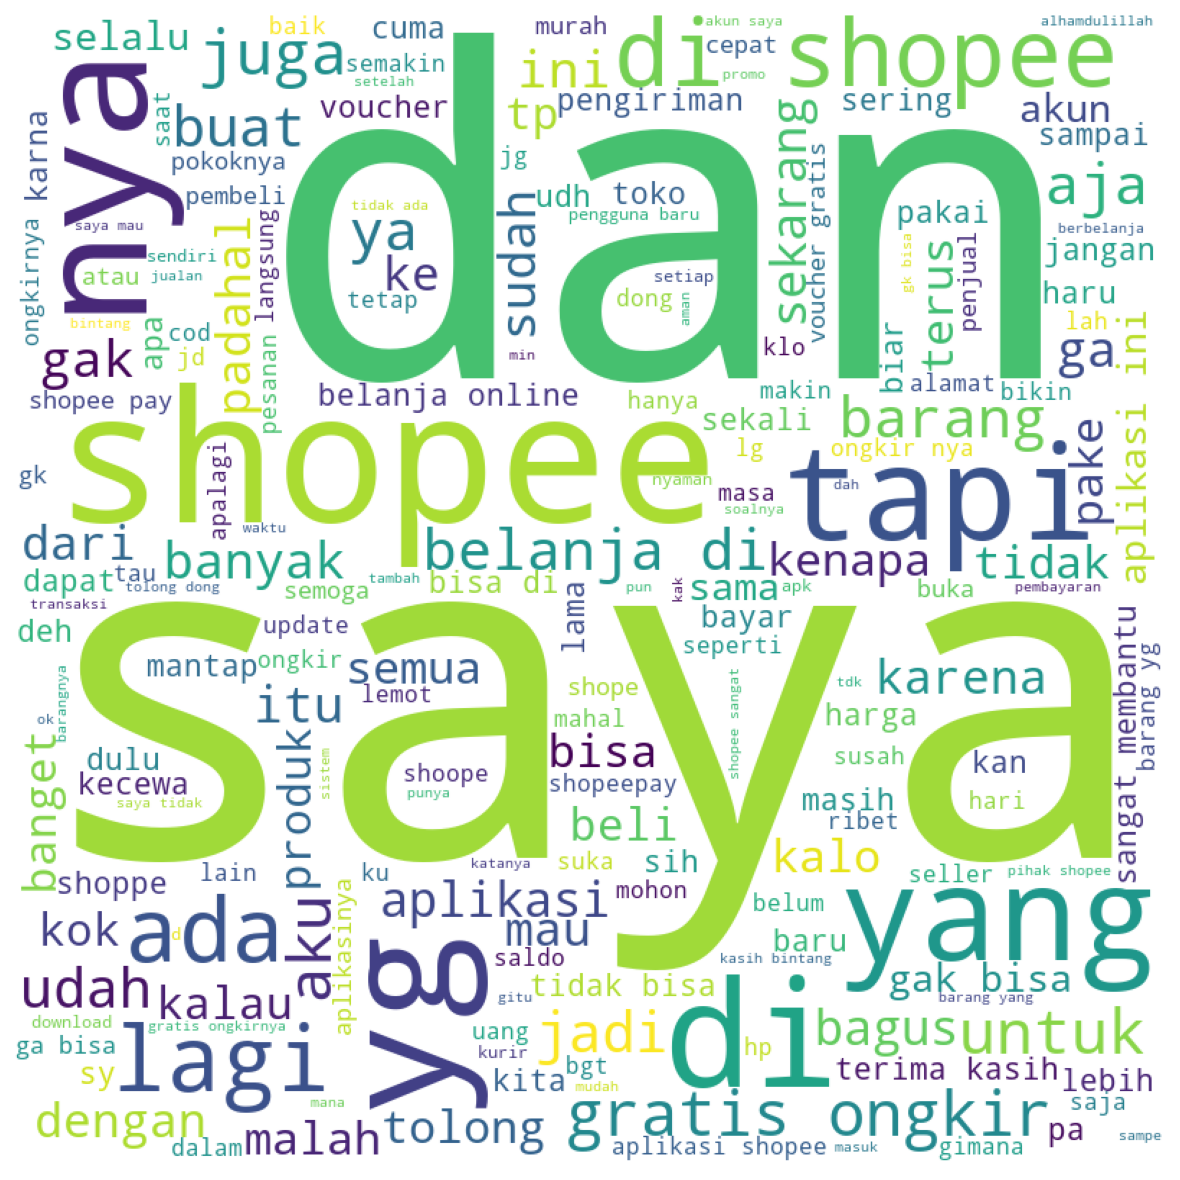

In [7]:
comment_words = ''
stops = set(stopwords.words('indonesian')) #NLTK
 
# iterate through the csv file
for val in data.ulasan:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

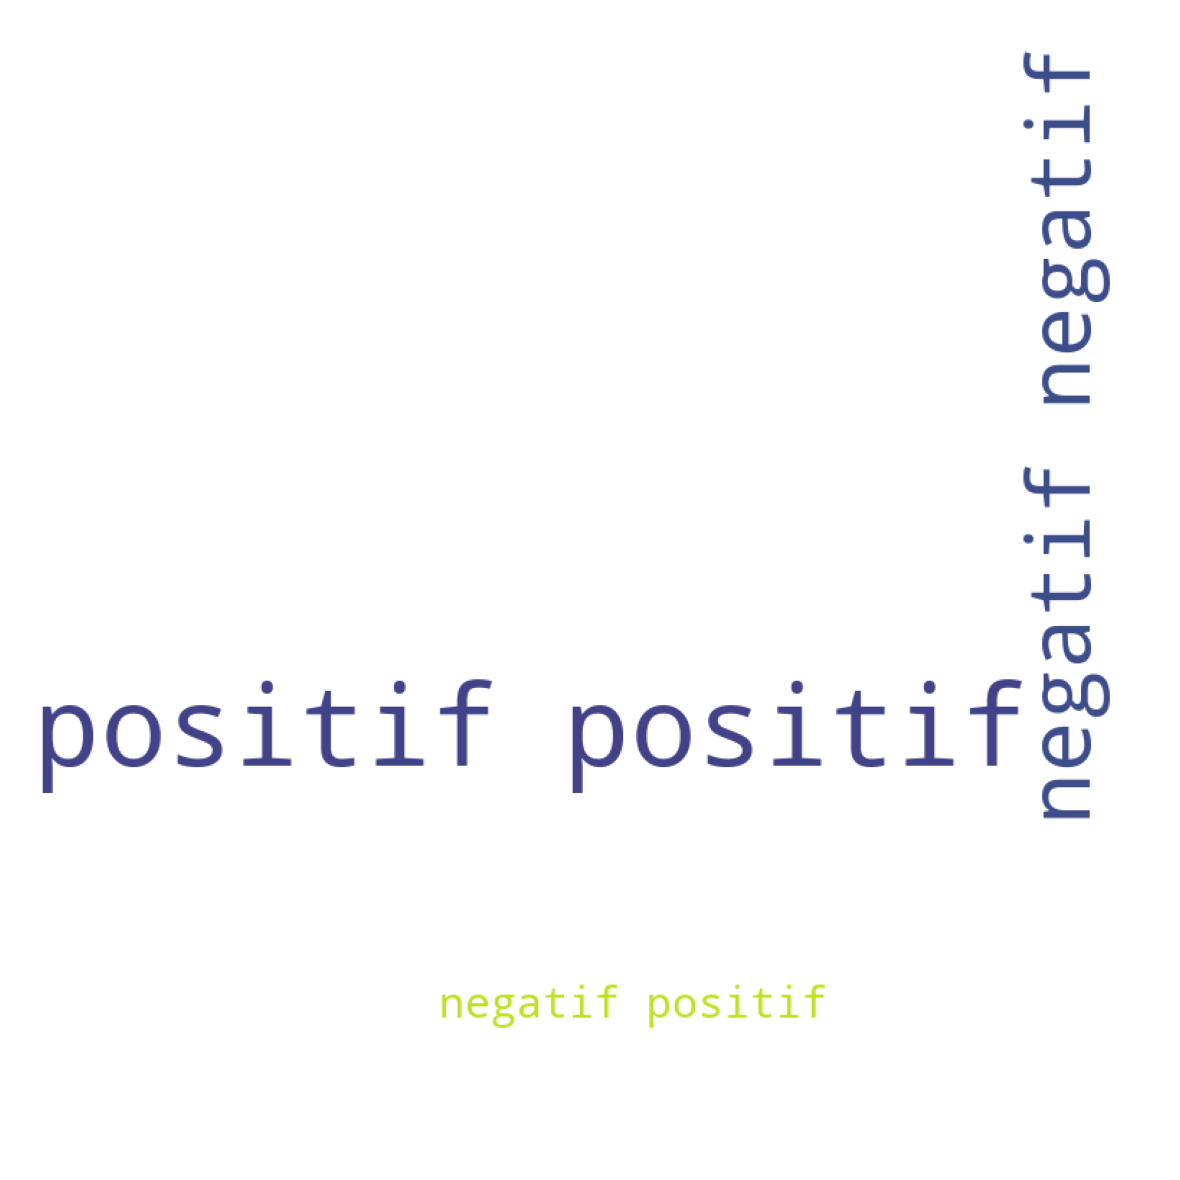

In [8]:
comment_words = ''
stop = set(STOPWORDS)
 
# iterate through the csv file
for val in data.label:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [9]:
print(STOPWORDS)

{"can't", 'them', 'we', 'how', 'your', 'cannot', "he's", 'their', 'doing', 'http', "they've", 'they', 'very', 'what', "wasn't", 'itself', "what's", 'off', "wouldn't", 'more', 'do', 'ours', "she'll", 'just', "i've", "there's", "you'll", "hadn't", 'than', "doesn't", 'same', "when's", 'me', 'about', "you're", 'does', 'also', 'any', 'this', 'if', "where's", "we've", 'yours', 'up', 'am', 'been', 'but', 'from', "i'll", 'k', 'such', 'where', 'on', "you'd", "i'm", 'did', 'through', 'each', "why's", 'to', 'himself', 'which', 'our', 'in', 'below', 'that', "couldn't", 'has', 'an', 'else', 'however', 'own', 'you', 'at', "they'll", 'by', 'her', "we'd", 'should', 'otherwise', 'being', 'like', 'yourself', 'having', 'can', "he'll", 'themselves', "who's", 'because', 'both', 'had', 'here', "they'd", 'those', 'for', 'until', 'his', 'while', 'so', 'could', 'other', 'was', "hasn't", "she's", 'then', "that's", 'after', 'before', 'ought', 'he', "they're", 'these', 'yourselves', "shan't", 'no', "let's", 'betw

In [10]:
print(stopwords.words('indonesian'))

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

In [11]:
#We only need the Headlines_text column from the data
data_text = data[['ulasan']]
datanggal = data[['tanggal']]
data_tgl = np.unique(np.array([ii[:10] for ii in datanggal['tanggal']]))
print(data_text)
print(data_tgl)

                                                 ulasan
0     Aplikasi shopee aku kok gak bisa gunain gratis...
1     Menyebalkan vocer penguna baru tidak bisa di p...
2     Saya sebagai penjual kecewa, penarikan saldo m...
3     Aplukasi apa sih ini disuruh buat nama uda gue...
4     Makin kesini Shoppe makin gak jelas. Apaan kab...
...                                                 ...
2932  Sangat nyaman untuk berbelanja di masa pandemi...
2933  Aplikasi ini sangat burik tapi sangat bagus se...
2934  shopee bagus banget, tapi skrng ga ada gratong...
2935  aplikasi jelek!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...
2936  Tambah lagi jadi bintang 5 karna vocer gratis ...

[2937 rows x 1 columns]
['01 Februar' '01 Januari' '01 Maret 2' '02 Februar' '02 Januari'
 '02 Maret 2' '03 Februar' '03 Januari' '03 Maret 2' '04 Februar'
 '04 Januari' '04 Maret 2' '05 Februar' '05 Januari' '05 Maret 2'
 '06 Februar' '06 Januari' '06 Maret 2' '07 Februar' '07 Januari'
 '07 Maret 2' '08 Februar' '08 Januari'

In [12]:
# We need to remove stopwords first. Casting all values to float will make it easier to iterate over.
data_text = data_text.astype('str')
print(data_text)

                                                 ulasan
0     Aplikasi shopee aku kok gak bisa gunain gratis...
1     Menyebalkan vocer penguna baru tidak bisa di p...
2     Saya sebagai penjual kecewa, penarikan saldo m...
3     Aplukasi apa sih ini disuruh buat nama uda gue...
4     Makin kesini Shoppe makin gak jelas. Apaan kab...
...                                                 ...
2932  Sangat nyaman untuk berbelanja di masa pandemi...
2933  Aplikasi ini sangat burik tapi sangat bagus se...
2934  shopee bagus banget, tapi skrng ga ada gratong...
2935  aplikasi jelek!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...
2936  Tambah lagi jadi bintang 5 karna vocer gratis ...

[2937 rows x 1 columns]


In [13]:
for idx in range(len(data_text)):
    listing = []
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    for word in data_text.iloc[idx]['ulasan'].split(' '):
        if "http" not in word:
            if "@" not in word:
                if "#" not in word:                        
                    #wod = word.translate(str.maketrans('','',string.punctuation)).lower()
                    if word not in stopwords.words('indonesian'):
                        if word.isalpha():
                            if len(word) > 2:
                                listing.append(word)
    data_text.iloc[idx]['ulasan'] = listing
    #print logs to monitor output
    if idx % 100 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)));

print(data_text)

c = 2900 / 2937                                                 ulasan
0     [Aplikasi, shopee, gak, gunain, gratis, ongkir...
1     [Menyebalkan, vocer, penguna, udh, penguna, pa...
2     [Saya, penjual, penarikan, saldo, bank, bank, ...
3     [Aplukasi, sih, disuruh, nama, uda, gue, tulis...
4     [Makin, kesini, Shoppe, gak, Apaan, kabanyakan...
...                                                 ...
2932  [Sangat, nyaman, berbelanja, pandemi, bangettttt]
2933  [Aplikasi, burik, bagus, selamat, mescoba, adi...
2934      [shopee, bagus, skrng, gratong, min, belanja]
2935                                  [aplikasi, boong]
2936  [Tambah, bintang, karna, vocer, gratis, ongkir...

[2937 rows x 1 columns]


In [14]:
#save data because it takes very long to remove stop words
pickle.dump(data_text, open('data_text.dat', 'wb'))

In [15]:
#get the words as an array for LDA input
train_komen = [value[0] for value in data_text.iloc[0:].values];
print('train_komen',train_komen)
print(len(train_komen))

train_komen [['Aplikasi', 'shopee', 'gak', 'gunain', 'gratis', 'ongkir', 'rupiah', 'vocer', 'nya', 'shopee', 'pay', 'gratis', 'ongkir', 'rupiah', 'nya', 'gak', 'pakek', 'shopee', 'pay', 'nya'], ['Menyebalkan', 'vocer', 'penguna', 'udh', 'penguna', 'pakek', 'vocer'], ['Saya', 'penjual', 'penarikan', 'saldo', 'bank', 'bank', 'teknologi', 'udah', 'bermasalah', 'bank', 'nya', 'sistem', 'shopeenya', 'transfer', 'bank', 'manapun', 'tergantung', 'shopeenya', 'proses'], ['Aplukasi', 'sih', 'disuruh', 'nama', 'uda', 'gue', 'tulis', 'nama', 'tersedi', 'aplikasi', 'tolol', 'mendingan', 'nggak', 'usa', 'donwlod', 'aja', 'mendingan', 'nggak', 'usa', 'plastore', 'plastore', 'uinstal', 'aja', 'aplikasi'], ['Makin', 'kesini', 'Shoppe', 'gak', 'Apaan', 'kabanyakan', 'Baru', 'belanja', 'kali', 'udh', 'kena', 'limit', 'harian', 'limit'], ['Shopee', 'memgecewakan', 'voucher', 'jambore', 'nya', 'error', 'produk', 'memenuhi', 'syarat', 'kecewa', 'check', 'out', 'voucher', 'sah', 'aneh', 'bet'], ['Aplikasi',

In [16]:
# Create Bigram & Trigram Models
bigram = gensim.models.Phrases(train_komen, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[train_komen], threshold=100)

for idx in range(len(train_komen)):
    for token in bigram[train_komen[idx]]:
        if '_' in token:
            # token is a bigram, add to document.
            train_komen[idx].append(token)
    for token in trigram[train_komen[idx]]:
        if '_' in token:
            train_komen[idx].append(token)

In [17]:
train_komen

[['Aplikasi',
  'shopee',
  'gak',
  'gunain',
  'gratis',
  'ongkir',
  'rupiah',
  'vocer',
  'nya',
  'shopee',
  'pay',
  'gratis',
  'ongkir',
  'rupiah',
  'nya',
  'gak',
  'pakek',
  'shopee',
  'pay',
  'nya'],
 ['Menyebalkan', 'vocer', 'penguna', 'udh', 'penguna', 'pakek', 'vocer'],
 ['Saya',
  'penjual',
  'penarikan',
  'saldo',
  'bank',
  'bank',
  'teknologi',
  'udah',
  'bermasalah',
  'bank',
  'nya',
  'sistem',
  'shopeenya',
  'transfer',
  'bank',
  'manapun',
  'tergantung',
  'shopeenya',
  'proses'],
 ['Aplukasi',
  'sih',
  'disuruh',
  'nama',
  'uda',
  'gue',
  'tulis',
  'nama',
  'tersedi',
  'aplikasi',
  'tolol',
  'mendingan',
  'nggak',
  'usa',
  'donwlod',
  'aja',
  'mendingan',
  'nggak',
  'usa',
  'plastore',
  'plastore',
  'uinstal',
  'aja',
  'aplikasi'],
 ['Makin',
  'kesini',
  'Shoppe',
  'gak',
  'Apaan',
  'kabanyakan',
  'Baru',
  'belanja',
  'kali',
  'udh',
  'kena',
  'limit',
  'harian',
  'limit'],
 ['Shopee',
  'memgecewakan',
 

In [18]:
# membuat dictionary dari text
dictionary = gensim.corpora.Dictionary(train_komen)
dictionary.filter_extremes(no_below=5, no_above=0.2)
print(dictionary)

Dictionary(1109 unique tokens: ['Aplikasi', 'gak', 'gratis', 'gunain', 'nya']...)


In [19]:
# mengonversi corpus ke dalam bentuk dokument term matrix menggunakan dictionary
doc_term_matrix = [dictionary.doc2bow(doc) for doc in train_komen]
# convert into the bag-of-words format
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) # build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]
corpus_tfidf

2937
[(103, 1), (128, 1), (189, 1), (466, 1), (467, 2)]


In [20]:
doc_term_matrix

[[(0, 1), (1, 2), (2, 2), (3, 1), (4, 3), (5, 2), (6, 1), (7, 2), (8, 1)],
 [(6, 1), (8, 2), (9, 1)],
 [(4, 1),
  (10, 1),
  (11, 4),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 2),
  (18, 1),
  (19, 1),
  (20, 1)],
 [(21, 2), (22, 2), (23, 1), (24, 1), (25, 2), (26, 2), (27, 1), (28, 1)],
 [(1, 1),
  (9, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 2)],
 [(4, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 3),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 2)],
 [(0, 1), (41, 1), (47, 1), (48, 1), (49, 2), (50, 1)],
 [(1, 1),
  (2, 1),
  (5, 2),
  (10, 1),
  (20, 1),
  (27, 1),
  (51, 1),
  (52, 2),
  (53, 1),
  (54, 2),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1)],
 [(4, 1),
  (5, 2),
  (10, 1),
  (27, 1),
  (46, 1),
  (48, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 2),
  (75, 1),
  

In [21]:
#kelompokkan komentar berdasar tanggal
harian = []
for tgl in data_tgl:
    harini = [train_komen[ii] for ii in range(len(datanggal)) if datanggal.iloc[ii]['tanggal'][:10] == tgl]
    harian.append(harini)
    print(len(harini))

7
1
105
11
4
105
5
3
150
8
6
122
8
3
125
7
3
133
7
7
109
4
5
102
7
7
119
6
1
112
5
3
124
8
4
100
5
1
110
3
3
90
6
5
109
25
6
202
23
4
88
32
5
1
38
3
30
3
44
8
41
10
54
2
65
5
72
5
95
6
80
6
89
10
6
4
7


In [22]:
#number of topics we will cluster for: 5
num_topics = 5;

In [23]:
# # LDA
# For LDA, we need to obtain a design matrix. To improve results, I am going to apply TfIdf transformation to the counts.

#the count vectorizer needs string inputs, not array, so I join them with a space.
#train_headlines_sentences = [' '.join(text) for text in train_headlines]
train_headlines_sentens = [[' '.join(text) for text in harini] for harini in harian]
print('\n','train_headlines_sentences',train_headlines_sentens)


 train_headlines_sentences [['Maaf kasi bintang bos lihat Klu kasi Aduh bos belanja line ongkirnya sepadan Klu beli jutaan harga kirim lbh aja beda ribu aja dgn prodak Klu kebanyakan pelanggan menghubungi saudara teman kota paketkan lbh Klu beli prodak belasan ribu ongkirnya lbh mahan puluhan Maaf bos sbg epaluasi aja', 'Udah suka cashback gratis Sayangnya kecewa program Bilangnya bunga terbaru cek sPaylater bunganya lumayan gila cicilan bunganya Auto gak', 'Emg sih serba Tapi kesini shopee buruk gratis ongkirnya cashbacknya doang gasemua Beda banget shopee Sumpah males pake shopee', 'Shopee gak event promosi free ongkir minimal bla bla bla kagak tetep aja kena ongkir dapet barang flash sale kalo kena ongkir mah males hitungan nya mahal ongkos gak kayak kalo promo free ongkir tuh beneran free harga barang nya gak kena ongkir mah cash back ampun dah flash_sale cash_back flash_sale cash_back flash_sale cash_back', 'Batas pembatalan nunggu beda Bukalapak kalo pembeli membatalkan pesanan 

In [24]:
#get the words as an array for LDA input
lda = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=num_topics);

In [25]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 7);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [26]:
get_lda_topics(lda, num_topics)

Topic # 01 Topic # 02 Topic # 03 Topic # 04 Topic # 05
0  Terima_kasih      boong  pay_later   Aplikasi     online
1        gratis   aplikasi        nya   aplikasi   membantu
2        Shopee     barang      bagus     banget      mudah
3        barang        nya     barang      bagus     gratis
4        ongkir      jelek    voucher        nya     ongkir
5      membantu        gak       suka       suka     Banyak
6         bagus       udah   Aplikasi  memuaskan      bagus

In [27]:
def get_lda_topics(lda, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    print('\n feat names')
    print(feat_names)    
    word_dict = {}
    for i in range(num_topics):
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-n_top_words - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words
        
    return pd.DataFrame(word_dict)

In [28]:
feedback = []
for y, santens in enumerate(train_headlines_sentens):
    # Now, we obtain a Counts design matrix, for which we use SKLearn’s CountVectorizer module. The transformation will return a matrix of size (Documents x Features), where the value of a cell is going to be the number of times the feature (word) appears in that document.
    # To reduce the size of the matrix, to speed up computation, we will set the maximum feature size to 5000, which will take the top 5000 best features that can contribute to our model.
    vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 3), max_features=5000)
    x_coints = vectorizer.fit_transform(santens)
    transformer = TfidfTransformer(smooth_idf=False)
    x_tfidf = transformer.fit_transform(x_coints)
    xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)
    model = LatentDirichletAllocation(n_components=num_topics, learning_method='online')
    model.fit(xtfidf_norm)
    toPik = get_lda_topics(lda, 7)
    print('tanggal',data_tgl[y])
    print('\n','konsep matrix \n',toPik)
    feedback.append(toPik)


 feat names
['aduh bos', 'aduh bos belanja', 'aja beda', 'aja beda ribu', 'aja dgn', 'aja dgn prodak', 'aja kena', 'aja kena ongkir', 'ampun dah', 'ampun dah flash_sale', 'apk soalnya', 'apk soalnya dapet', 'auto gak', 'back ampun', 'back ampun dah', 'bagus pokoknya', 'bagus pokoknya thebest', 'bal bal', 'bal bal bal', 'bal bal dondload', 'bal dondload', 'bal dondload nantirugi', 'banget shopee', 'banget shopee sumpah', 'barang flash', 'barang flash sale', 'barang murah', 'barang nya', 'barang nya gak', 'batal menunggu', 'batal menunggu persetujuan', 'batas pembatalan', 'batas pembatalan nunggu', 'batu nunggu', 'batu nunggu sampe', 'beda banget', 'beda banget shopee', 'beda bukalapak', 'beda bukalapak kalo', 'beda ribu', 'beda ribu aja', 'belanja line', 'belanja line ongkirnya', 'belasan ribu', 'belasan ribu ongkirnya', 'beli jutaan', 'beli jutaan harga', 'beli prodak', 'beli prodak belasan', 'beneran free', 'beneran free harga', 'bilangnya bunga', 'bilangnya bunga terbaru', 'bintang 

In [29]:
model.fit(x_coints)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [30]:
x_coints.shape

(7, 268)

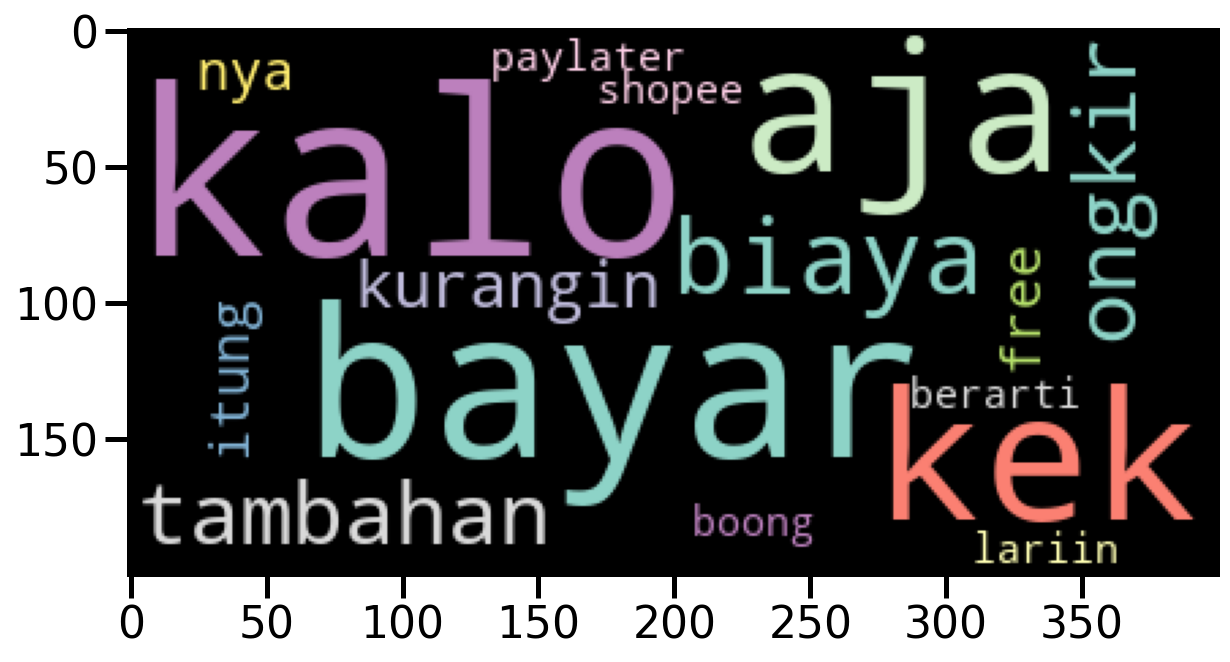

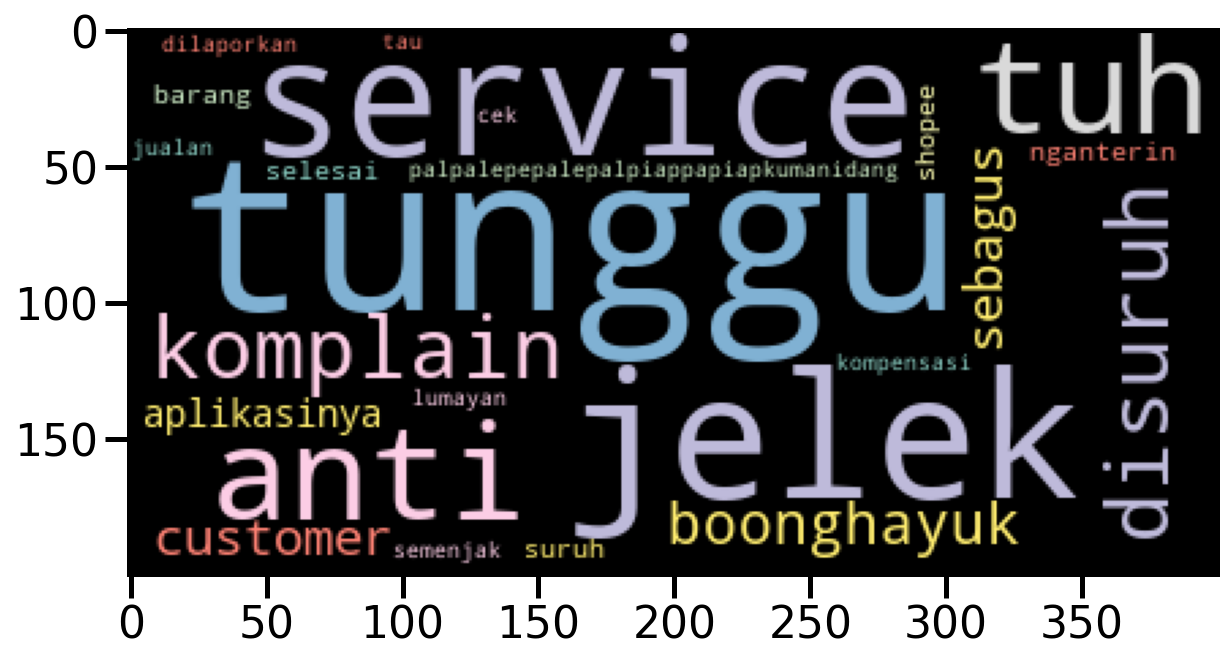

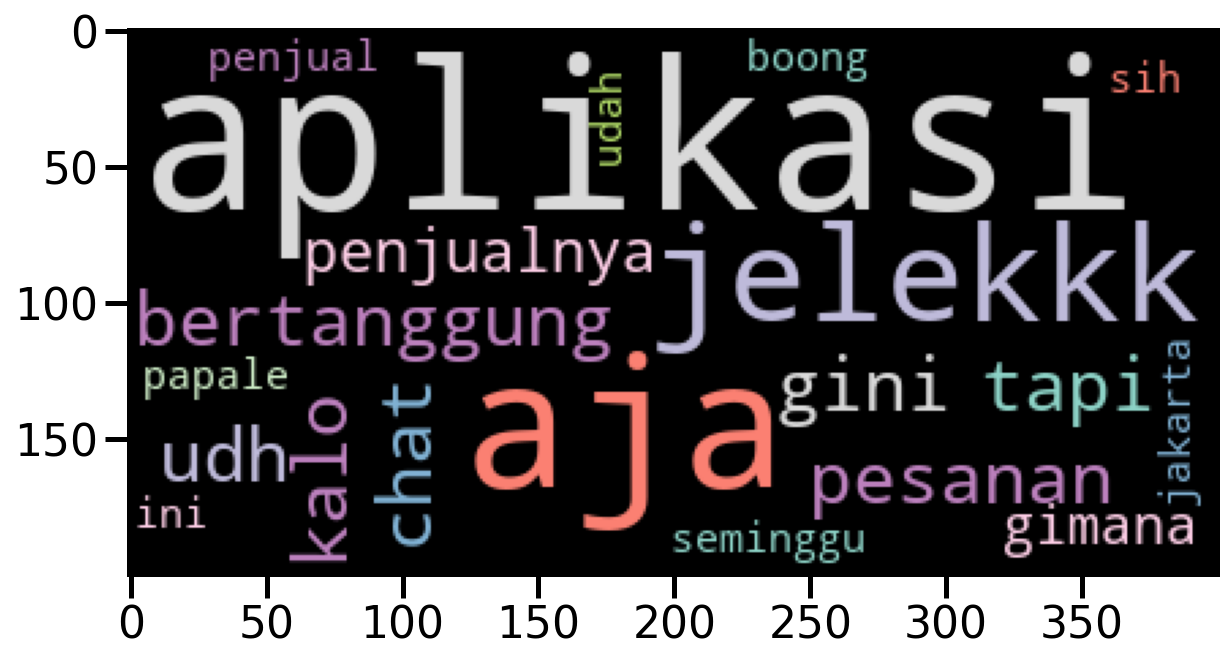

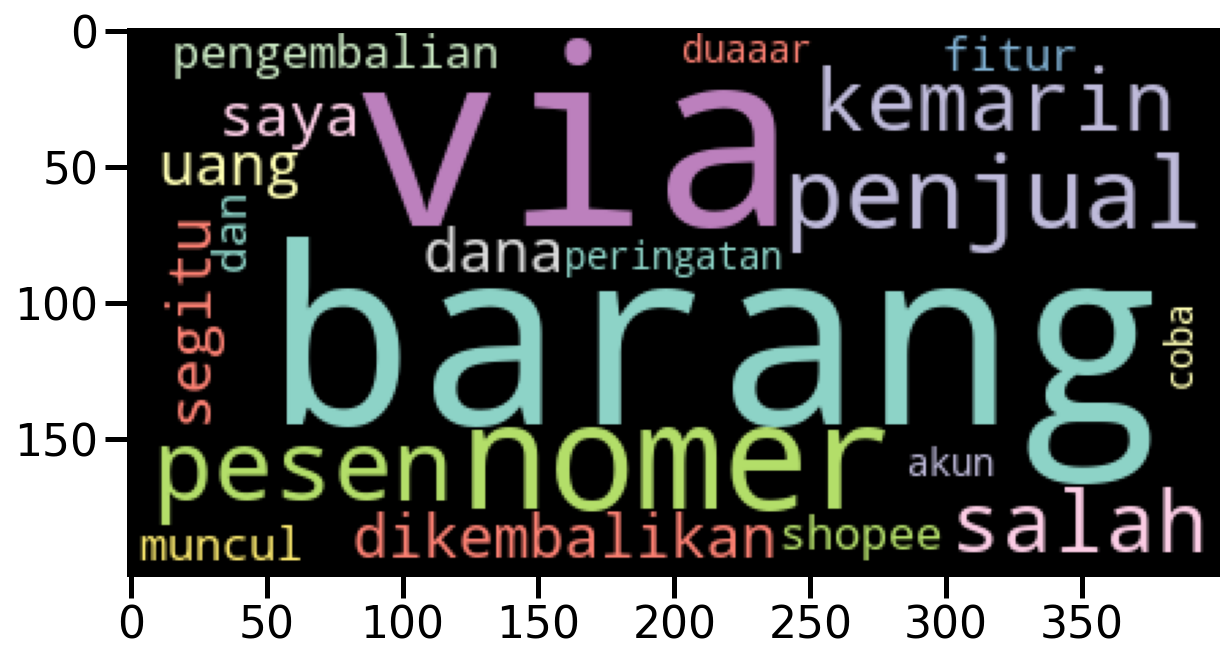

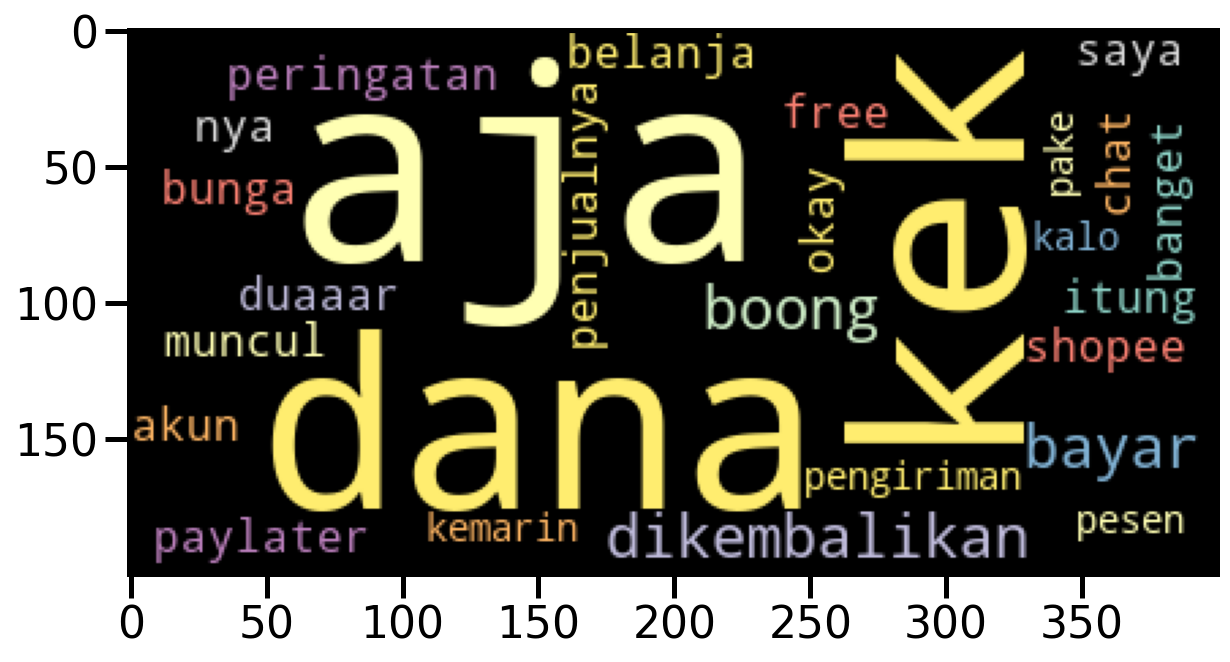

In [33]:
for index, topic in enumerate(model.components_):
    tmps = [vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]]
    teks = " ".join(str(topik) for topik in tmps)
    wcloud = WordCloud(max_words=50, colormap='Set3', background_color='black').generate(teks)
    plt.figure(figsize=(10,5))
    plt.imshow(wcloud)
    plt.show()

In [71]:
# directory for storing all lda models
model_dir = 'lda_checkpoint'
if not os.path.isdir(model_dir):
    os.mkdir(model_dir)
    
# load the model if we've already trained it before
n_topics = 5
path = os.path.join(model_dir, 'topic_model.lda')
if not os.path.isfile(path):
    # training LDA can take some time, we could set
    # eval_every = None to not evaluate the model perplexity
    topic_model = ldamodel.LdaModel(
        corpus, id2word = id2word, num_topics = 5, iterations = 200)
    topic_model.save(path)

topic_model = ldamodel.LdaModel.load(path)

In [72]:
# each element of the list is a tuple 
# containing the topic and word / probability list
topics = topic_model.show_topics(num_words = 7, formatted = False)
topics

[(0,
  [('kontol', 0.08744821),
   ('the', 0.06854103),
   ('haters', 0.042517327),
   ('bang', 0.038242705),
   ('ericko', 0.03148651),
   ('manis', 0.013826796),
   ('kaya', 0.013642657)]),
 (1,
  [('anjing', 0.016867295),
   ('org', 0.013192718),
   ('subs', 0.01136732),
   ('kontol', 0.010777827),
   ('aja', 0.01013934),
   ('gua', 0.009913287),
   ('haters', 0.009774366)]),
 (2,
  [('botak', 0.052329987),
   ('boong', 0.0279025),
   ('ganteng', 0.016068464),
   ('intro', 0.014857458),
   ('limit', 0.013323243),
   ('intronya', 0.011238457),
   ('kangen', 0.010029408)]),
 (3,
  [('bang', 0.061806425),
   ('gua', 0.050524745),
   ('semangat', 0.020269655),
   ('suka', 0.01947268),
   ('rick', 0.018695941),
   ('like', 0.017474735),
   ('konten', 0.014096704)]),
 (4,
  [('memek', 0.04861869),
   ('bau', 0.040241),
   ('fans', 0.019540569),
   ('coli', 0.017885646),
   ('erick', 0.012930434),
   ('opening', 0.011321458),
   ('cok', 0.011229276)]),
 (5,
  [('ericko', 0.18128532),
   ('

In [73]:
%%time
lda_model = gensim.models.LdaModel(corpus=corpus_tfidf, id2word=dictionary,
                                   chunksize=1740, alpha='auto',
                                   eta='auto', random_state=42,
                                   iterations=500, num_topics=5,
                                   passes=20, eval_every=None)

Wall time: 20.7 s


In [74]:
#Viewing the topics in our trained topic model
for topic_id, topic in lda_model.print_topics(num_topics=5, num_words=20):
    print('Topic #'+str(topic_id+1)+':')
    print(topic)
    print()

Topic #1:
0.017*"nya" + 0.015*"barang" + 0.014*"ongkir" + 0.014*"aplikasi" + 0.014*"gratis" + 0.014*"bagus" + 0.013*"banget" + 0.012*"Aplikasi" + 0.011*"suka" + 0.011*"gak" + 0.010*"Shopee" + 0.009*"pengiriman" + 0.008*"aja" + 0.008*"Saya" + 0.008*"beli" + 0.008*"harga" + 0.008*"voucher" + 0.008*"sesuai" + 0.007*"online" + 0.007*"murah"

Topic #2:
0.014*"limit" + 0.012*"akun" + 0.012*"Banyak" + 0.011*"shopeepay" + 0.009*"biaya" + 0.009*"login" + 0.008*"paylater" + 0.008*"saldo" + 0.008*"ekspedisi" + 0.008*"pembayaran" + 0.007*"Lebih" + 0.007*"buruan" + 0.007*"mohon" + 0.007*"menu" + 0.006*"kayak" + 0.006*"skrng" + 0.006*"Jadi" + 0.005*"bayar" + 0.005*"masuk" + 0.005*"pakai"

Topic #3:
0.026*"Terima_kasih" + 0.023*"membantu" + 0.015*"puas" + 0.014*"semoga" + 0.014*"Belanja" + 0.014*"sukses" + 0.013*"berbelanja" + 0.012*"Sangat" + 0.011*"kebutuhan" + 0.010*"Terima" + 0.010*"seller" + 0.010*"Shopee" + 0.009*"kasih" + 0.009*"mantap" + 0.009*"terima" + 0.009*"Mantap" + 0.009*"Alhamdulillah"

In [75]:
#viewing the overall mean coherence score of the model
topics_coherences = lda_model.top_topics(corpus_tfidf, topn=20)
avg_coherence_score = np.mean([item[1] for item in topics_coherences])
print('Avg. Coherence Score:', avg_coherence_score)

Avg. Coherence Score: -11.595358059176188


In [76]:
#looking at the output of our LDA topic model
topics_with_wts = [item[0] for item in topics_coherences]
print('LDA Topics with Weights')
print('='*50)
for idx, topic in enumerate(topics_with_wts):
    print('Topic #'+str(idx+1)+':')
    print([(term, round(wt, 3)) for wt, term in topic])
    print()

LDA Topics with Weights
Topic #1:
[('nya', 0.017), ('barang', 0.015), ('ongkir', 0.014), ('aplikasi', 0.014), ('gratis', 0.014), ('bagus', 0.014), ('banget', 0.013), ('Aplikasi', 0.012), ('suka', 0.011), ('gak', 0.011), ('Shopee', 0.01), ('pengiriman', 0.009), ('aja', 0.008), ('Saya', 0.008), ('beli', 0.008), ('harga', 0.008), ('voucher', 0.008), ('sesuai', 0.008), ('online', 0.007), ('murah', 0.007)]

Topic #2:
[('Terima_kasih', 0.026), ('membantu', 0.023), ('puas', 0.015), ('semoga', 0.014), ('Belanja', 0.014), ('sukses', 0.014), ('berbelanja', 0.013), ('Sangat', 0.012), ('kebutuhan', 0.011), ('Terima', 0.01), ('seller', 0.01), ('Shopee', 0.01), ('kasih', 0.009), ('mantap', 0.009), ('terima', 0.009), ('Mantap', 0.009), ('Alhamdulillah', 0.009), ('Semoga', 0.009), ('terbaik', 0.008), ('mencari', 0.008)]

Topic #3:
[('limit', 0.014), ('akun', 0.012), ('Banyak', 0.012), ('shopeepay', 0.011), ('biaya', 0.009), ('login', 0.009), ('paylater', 0.008), ('saldo', 0.008), ('ekspedisi', 0.008),

In [77]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=5)
for idx, topic in model.print_topics():
    print('Topic: () word: {}'.format(idx, topic))

Topic: () word: 0
Topic: () word: 1
Topic: () word: 2
Topic: () word: 3
Topic: () word: 4


In [78]:
#viewing the topics as a list of terms without the weights
print('LDA Topics without Weights')
print('='*50)
for idx, topic in enumerate(topics_with_wts):
    print('Topic #'+str(idx+1)+':')
    print([term for wt, term in topic])
    print()

LDA Topics without Weights
Topic #1:
['nya', 'barang', 'ongkir', 'aplikasi', 'gratis', 'bagus', 'banget', 'Aplikasi', 'suka', 'gak', 'Shopee', 'pengiriman', 'aja', 'Saya', 'beli', 'harga', 'voucher', 'sesuai', 'online', 'murah']

Topic #2:
['Terima_kasih', 'membantu', 'puas', 'semoga', 'Belanja', 'sukses', 'berbelanja', 'Sangat', 'kebutuhan', 'Terima', 'seller', 'Shopee', 'kasih', 'mantap', 'terima', 'Mantap', 'Alhamdulillah', 'Semoga', 'terbaik', 'mencari']

Topic #3:
['limit', 'akun', 'Banyak', 'shopeepay', 'biaya', 'login', 'paylater', 'saldo', 'ekspedisi', 'pembayaran', 'Lebih', 'buruan', 'mohon', 'menu', 'kayak', 'skrng', 'Jadi', 'bayar', 'masuk', 'pakai']

Topic #4:
['alamat', 'check_out', 'nama', 'muncul', 'pokok', 'out', 'good', 'ganti', 'Setiap', 'mengatas_namakan', 'akun', 'Gratis_Ongkir', 'boonk', 'nomer', 'serba', 'sll', 'selamat', 'tulisan', 'bener', 'mall']

Topic #5:
['the_best', 'the', 'Produk', 'best', 'biaya_penanganan', 'via', 'email', 'berkali_kali', 'dana', 'SHOPEE

In [79]:
umass_coherence_model_lda = gensim.models.CoherenceModel(model=lda_model,
                                                         corpus=corpus_tfidf,
                                                         texts=train_komen,
                                                         dictionary=dictionary,
                                                         coherence='u_mass')
avg_coherence_umass = umass_coherence_model_lda.get_coherence()

perplexity = lda_model.log_perplexity(corpus_tfidf)

print('Avg. Coherence Score (UMass):', avg_coherence_umass)
print('Model Perplexity:', perplexity)

Avg. Coherence Score (UMass): -11.595358059176188
Model Perplexity: -7.354375900560417


In [80]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel( corpus=corpus_tfidf, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=lda_model, texts=train_komen, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [81]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=train_komen, start=2, limit=40, step=6)

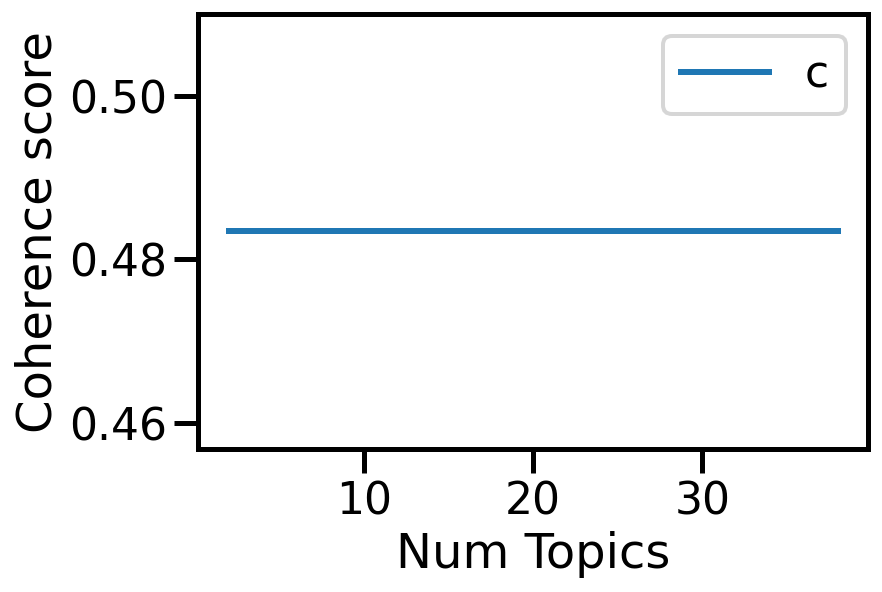

In [82]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [83]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 7))

Num Topics = 2  has Coherence Value of 0.4834165
Num Topics = 8  has Coherence Value of 0.4834165
Num Topics = 14  has Coherence Value of 0.4834165
Num Topics = 20  has Coherence Value of 0.4834165
Num Topics = 26  has Coherence Value of 0.4834165
Num Topics = 32  has Coherence Value of 0.4834165
Num Topics = 38  has Coherence Value of 0.4834165


In [87]:
LDA_viz = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary)
pyLDAvis.save_html(LDA_viz, "E:/dataset/LDA.html")

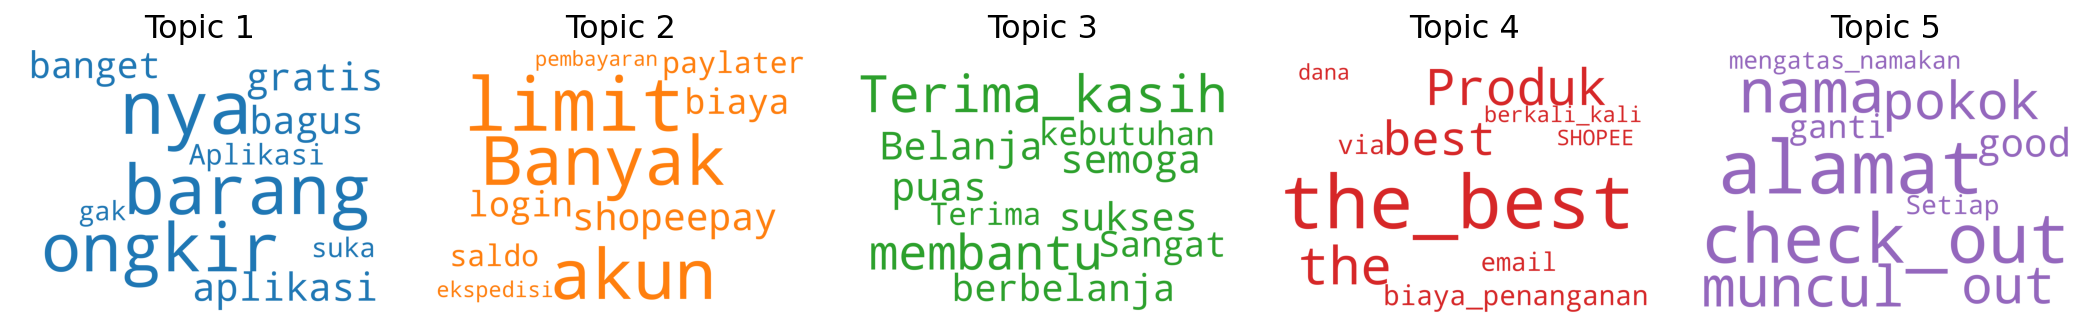

In [85]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 5, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=500)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()